# <p style="text-align:center;" >  <span style="font-size:42px" > <span style='background:'> **Classification - Prediction of House Grade** </span> <span> <span>  </p> 


******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Loading Dataset <span>  </div> <p>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B


*******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Data Preprocessing <span>  </div> <p>

<span style="font-size:28px" ><mark> Knowing our dataset </mark> <span> 

In [3]:
df.shape

(3000, 14)

In [4]:
df.ndim

2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [6]:
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [7]:
from tabulate import tabulate

a = df.select_dtypes(exclude='object')
b = df.select_dtypes(include='object')

a_lst=list(a.columns)
b_lst=list(b.columns)

print(tabulate({'categorical':b_lst,'numerical':a_lst},headers = ['Categorical','Numerical']))

Categorical    Numerical
-------------  --------------
roof           Id
Grade          Area(total)
               Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price


In [8]:
df['Grade'].unique()

array(['D', 'C', 'B', 'A', 'E'], dtype=object)

In [9]:
df['Grade'].value_counts()

D    1270
C     716
B     539
A     399
E      76
Name: Grade, dtype: int64

 ><span style="font-size:18px" > We have 5 unique classes in our dataset : A,B,C,D and E

****************

<span style="font-size:28px" ><mark>  Identifying and handling the missing values </mark> <span>

In [10]:
df.isnull().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

 ><span style="font-size:18px" >No missing values present in our dataset

*******************

<span style="font-size:28px" ><mark>  Visual EDA  </mark> <span> 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

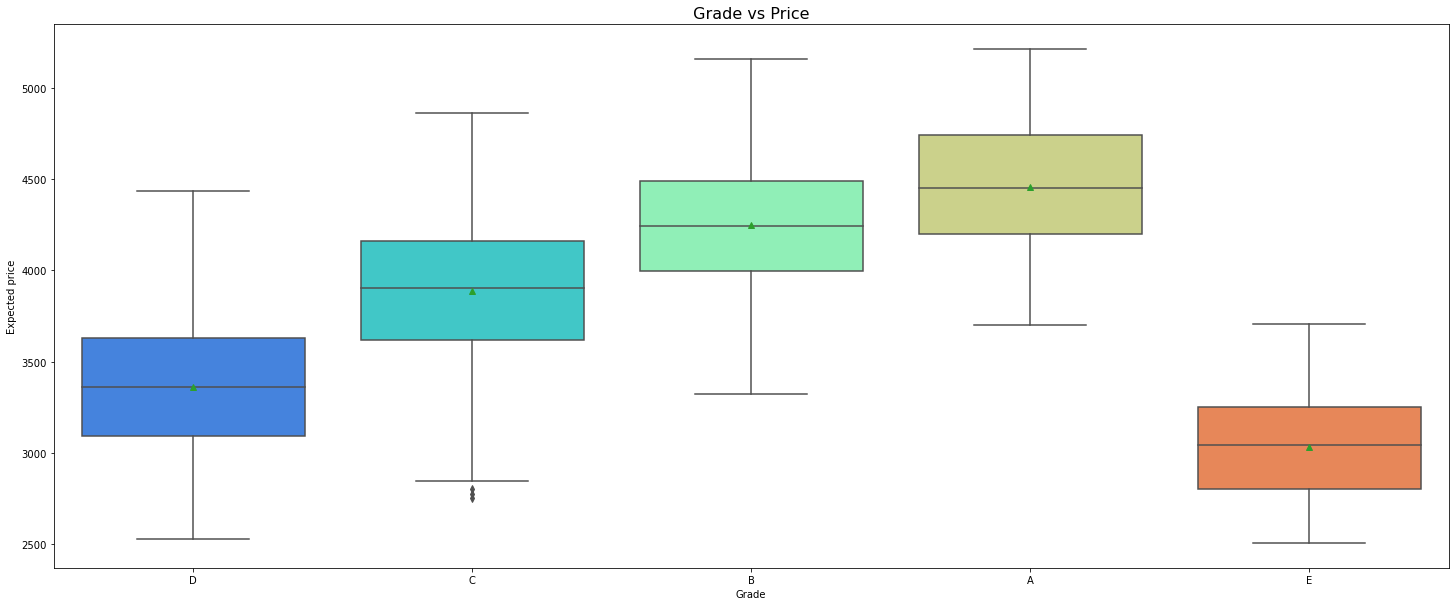

In [12]:
plt.figure(figsize=(25,10))
plt.title(' Grade vs Price ',fontsize=16)
sb.boxplot(x= 'Grade', data = df , y = 'Expected price' , showmeans = True ,palette = 'rainbow' ) 
plt.show()

 ><span style="font-size:18px" >We can see that the first label that is class A has the highest range and wider spread of expected price and D being the lowest of all.
    We all see above in unqiue counts that D has the most count which can mean that is low priced because they may be less diserable.

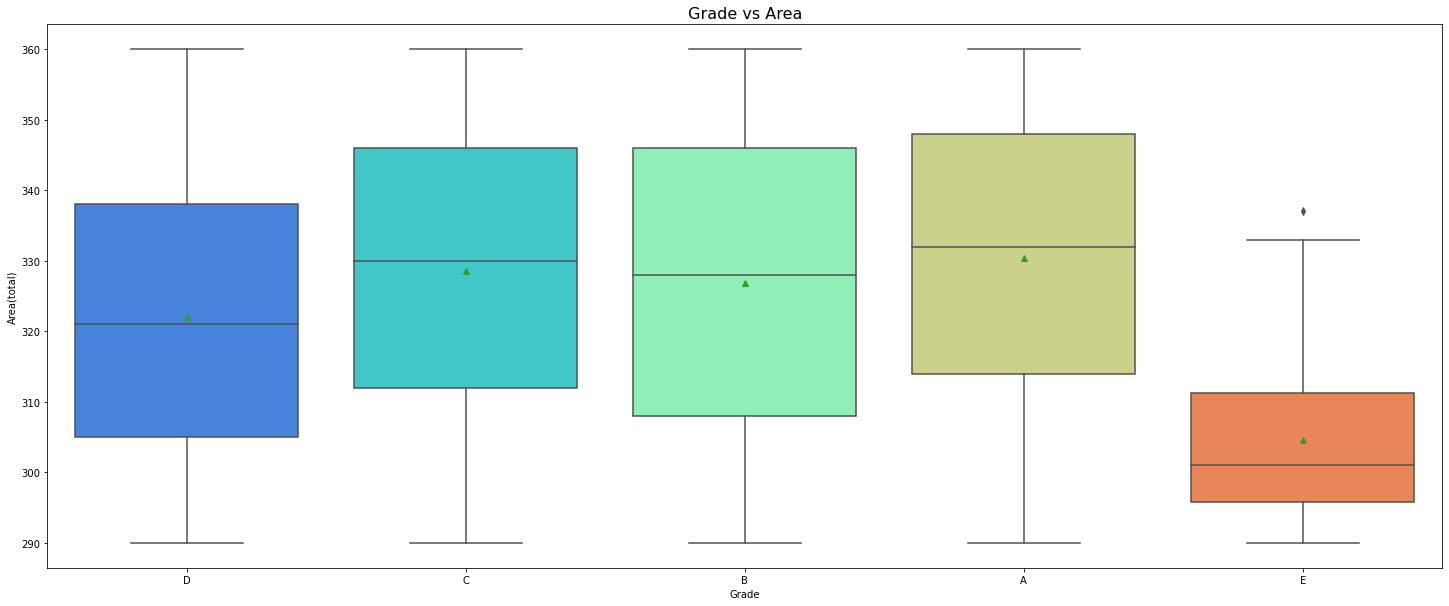

In [13]:
plt.figure(figsize=(25,10))
plt.title(' Grade vs Area ',fontsize=16)
sb.boxplot(x= 'Grade', data = df , y = 'Area(total)' , showmeans = True ,palette = 'rainbow' ) 
plt.show()

 ><span style="font-size:18px" >We see grade B has the wider spread of area while Grade A and C are very similar in terms of spread and range and average area.

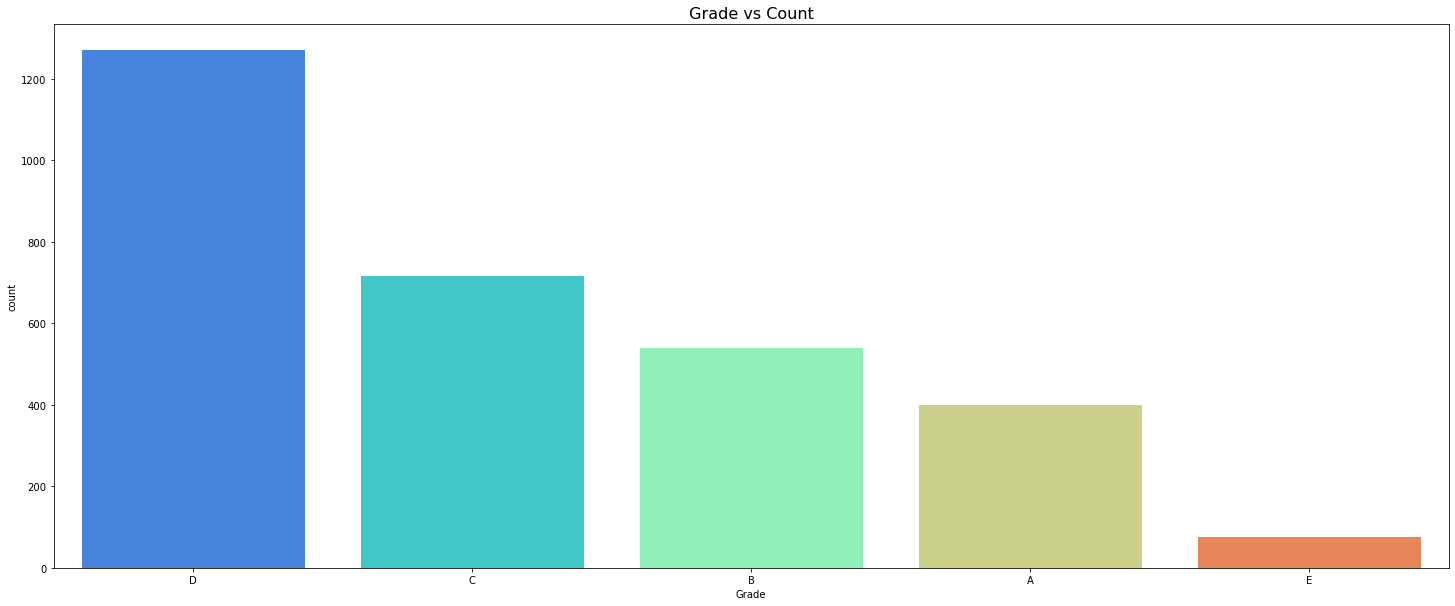

In [14]:
plt.figure(figsize=(25,10))
plt.title(' Grade vs Count ',fontsize=16)
sb.countplot(x= 'Grade', data = df ,palette = 'rainbow' ) 
plt.show()

 ><span style="font-size:18px" >We can see that the Grade D has the most number of houses on the market as compared to the other grades with grade E having the least listings

********************

<span style="font-size:28px" ><mark>  Encoding our categorical data to numeric data </mark> <span> 

In [15]:
from sklearn import preprocessing   
label_encoder = preprocessing.LabelEncoder()  

In [16]:
columns = df.columns

for col in columns:
    a = df[col].dtype
    if a == 'object':
        df[col]=df[col].astype('category')

for col in columns:
    a = df[col].dtype
    if a == 'category':
        df[col]=label_encoder.fit_transform(df[col])

In [17]:
df.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int64
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int64
dtype: object

In [18]:
df['Grade'].unique()

array([3, 2, 1, 0, 4])

****************

<span style="font-size:28px" ><mark>  Correlation </mark> <span> 

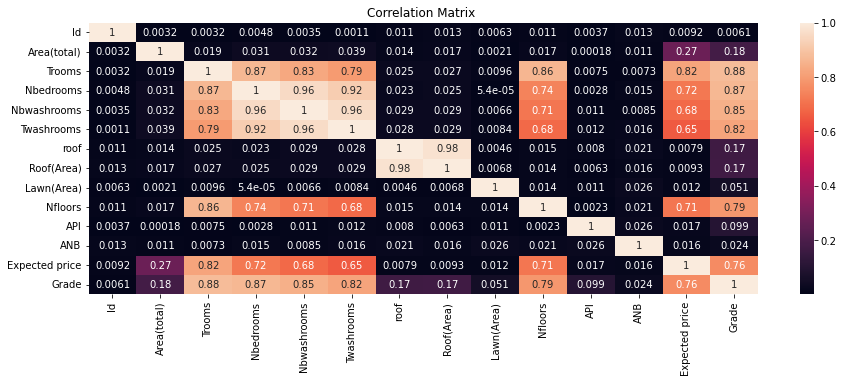

In [19]:
plt.figure(figsize=(15,5))
corr = abs(df.corr())
heat_map = sb.heatmap(abs(corr), annot = True)
heat_map.set(title = "Correlation Matrix ")
plt.show()

In [20]:
corr['Grade'].sort_values(ascending=False)

Grade             1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof              0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade, dtype: float64

 ><span style="font-size:18px" > We can see the features and their correlation with the Grades and eslabiosh what impact these features have on the Grade of the house.

*****************

<span style="font-size:28px" ><mark>  Data Spliting </mark> <span> 

In [21]:
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

***************

<span style="font-size:28px" ><mark>  Data Scaling </mark> <span> 

In [23]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

**********************

<span style="font-size:28px" ><mark>  Dimension Reduction </mark> <span> 

## LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components= 4)
x_train = lda.fit_transform(X_train, y_train)
x_test = lda.transform(X_test)

 ><span style="font-size:18px" > I have tried LDA as this is a supervised learning model and beacause we want to seperate our classes in a way to predict them easily.

******************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Model Building <span>  </div> <p>

## Since this is a Classification problem we will be trying different classification algorithms to see which model gives us the best results.

### We will also try PCA and LDA for dimension reductionality to see which works better for particular models and gives us better results.

&#10148; Naive Bayes </br>
&#10148; Random Forest Classifier</br>
&#10148; Decision Tree</br>
&#10148; K NearestNeighbours Classifier

### We will build our model, evaluate and compare the model to find the best fit algortihm for this dataset.

********************

<span style="font-size:28px" ><mark>  Naive Bayes </mark> <span> 

### Loading the needed Libraries

In [25]:
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier

### Building and fitting the model

In [26]:
naive_bayes = GaussianNB()  
naive_bayes.fit(x_train, y_train)

GaussianNB()

### Predictions 

In [27]:
y_pred_test_nb = naive_bayes.predict(x_test)
y_pred_test_nb

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 0, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 1, 0, 0,
       1, 3, 3, 3, 3, 3, 1, 0, 3, 1, 3, 3, 3, 0, 0, 3, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 2,
       2, 1, 3, 2, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 2, 0, 1, 3, 3, 2, 3, 4, 0, 3, 3, 4,
       3, 3, 0, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 2, 3, 1, 3, 0, 2,
       3, 3, 1, 2, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 4, 4, 0,
       3, 0, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 0, 3,

### Visualization

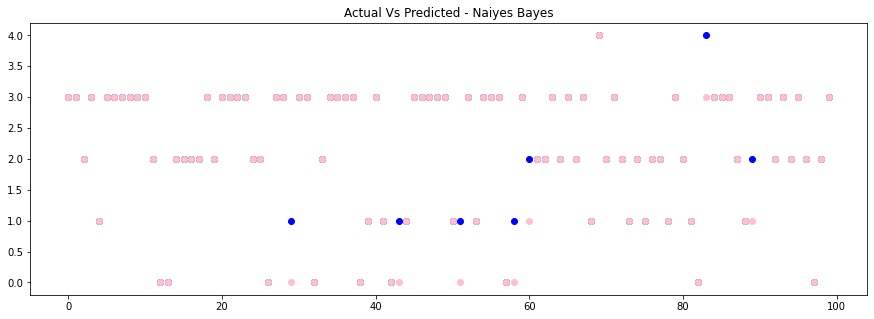

In [28]:
plt.figure(figsize=(15,5))
plt.title('Actual Vs Predicted - Naiyes Bayes')
x = np.arange(len(y_test[:100]))
plt.scatter(x,y_test[:100],label='Actual',color='b')
plt.scatter(x,y_pred_test_nb[:100],label='Predicted',color='pink')

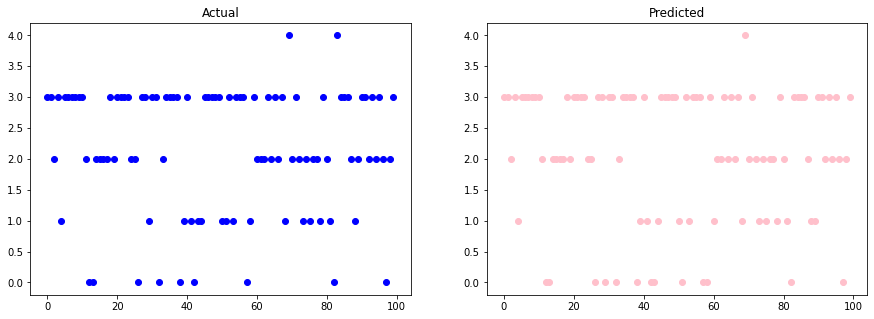

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Actual')
plt.scatter(x,y_test[:100],color='b')
plt.subplot(122)
plt.title('Predicted')
plt.scatter(x,y_pred_test_nb[:100],color='pink')

In [30]:
y_test[:100]

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 2, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 4, 3, 3, 3, 2,
       1, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3])

### Confusion Matrix 

x is the Predicted Label 
y is the Actual label

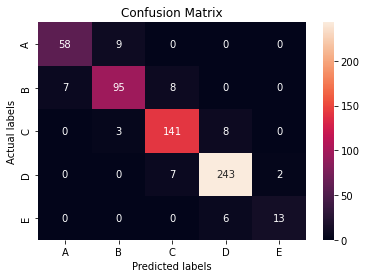

In [31]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test_nb)  

ax= plt.subplot()
sb.heatmap(cm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A','B','C','D','E']); ax.yaxis.set_ticklabels(['A','B','C','D','E']);


<span style="font-size:18px" >We can see there are few wrongly predicted datapoints.

### Errors Evaluation

In [32]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
as_nb = accuracy_score(y_test, y_pred_test_nb)
rc_nb = recall_score(y_test, y_pred_test_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_test_nb, average='weighted')
pc_nb = precision_score(y_test, y_pred_test_nb,average='weighted')

In [33]:
compare = pd.DataFrame()

compare['Model']=['Naive Bayes']
compare['Accuracy']=[as_nb]
compare['Recall']=[rc_nb]
compare['F1-score']=[f1_nb]
compare['Precision']=[pc_nb]

compare

,Model,Accuracy,Recall,F1-score,Precision
0,Naive Bayes,0.916667,0.916667,0.915839,0.915953


<span style="font-size:18px" > We can see the evalution metric scores 

***********************

<span style="font-size:28px" ><mark>  Decision Tree With Hyperparameter Tuning </mark> <span> 

### Loading the libraries

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import  RepeatedStratifiedKFold,GridSearchCV
import numpy as np

### Performing Grid search to get best estimator 

In [35]:


cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3, random_state=10)

param_grid = {'max_depth' : np.arange(1,15)}

tree_clas = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=cv, verbose=True , error_score='raise')

grid_search.fit(x_train, y_train)

#best score of model
test_score= grid_search.best_score_

#Best score estimator
best_est = grid_search.best_estimator_
print()
print("Best Test Score : ", test_score)
print()
print("Best Estimator : ", best_est)

Fitting 15 folds for each of 14 candidates, totalling 210 fits

Best Test Score :  0.9513888888888888

Best Estimator :  DecisionTreeClassifier(max_depth=10)


<span style="font-size:18px" > We see the max_depth is 11.

### Building and Fitting Decision Tree classifer model

In [36]:
dt_model = DecisionTreeClassifier(max_depth=11).fit(x_train,y_train)

### Predictions

In [37]:
y_pred_dt = dt_model.predict(x_test)
y_pred_dt

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 1, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 4, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 4, 3, 3, 2, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 3, 0, 1, 3, 4, 2, 3, 4, 0, 3, 3, 4,
       3, 3, 0, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 2,
       3, 4, 0, 2, 2, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 1, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 4, 4, 0,
       3, 0, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 3, 0, 3,

### Visualization

In [38]:
y_pred_dt

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 1, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 4, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 4, 3, 3, 2, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 1, 3,
       3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 3, 0, 1, 3, 4, 2, 3, 4, 0, 3, 3, 4,
       3, 3, 0, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3, 0, 2,
       3, 4, 0, 2, 2, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 2, 2, 2, 1, 3, 3, 2, 2, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 1, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 4, 4, 0,
       3, 0, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 3, 0, 3,

In [39]:
pred = pd.DataFrame()
pred['y_test'] = y_test
pred['y_pred'] = y_pred_dt
pred

,y_test,y_pred
0,3,3
1,3,3
2,2,2
3,3,3
4,1,1
...,...,...
595,2,2
596,3,3
597,0,0
598,3,3


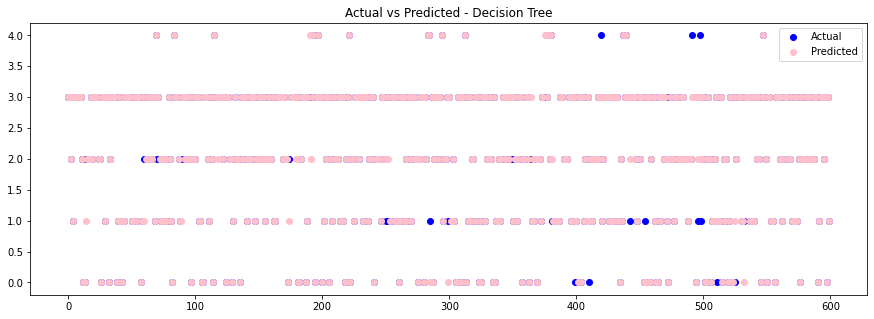

In [82]:

plt.figure(figsize=(15,5))

x = np.arange(len(y_test))
plt.title('Actual vs Predicted - Decision Tree')
plt.scatter(x,y_test,label='Actual',color='b')
plt.scatter(x,y_pred_dt,label='Predicted',color='pink')
plt.legend()
plt.show()

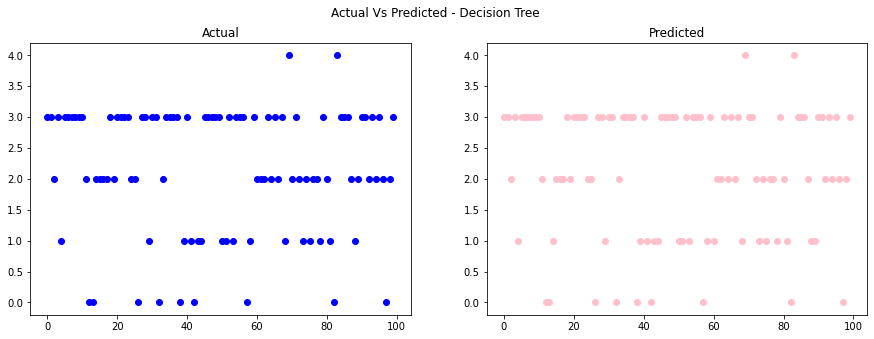

In [41]:
plt.figure(figsize=(15,5))
plt.suptitle('Actual Vs Predicted - Decision Tree')
x = np.arange(len(y_test[:100]))
plt.subplot(121)
plt.title('Actual')
plt.scatter(x,y_test[:100],color='b')
plt.subplot(122)
plt.title('Predicted')
plt.scatter(x,y_pred_dt[:100],color='pink')
plt.show()

### Confusion Matrix

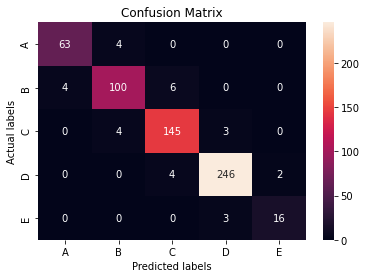

In [42]:
cmdt = confusion_matrix(y_test, y_pred_dt)  

ax= plt.subplot()
sb.heatmap(cmdt, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A','B','C','D','E']); ax.yaxis.set_ticklabels(['A','B','C','D','E']);

<span style="font-size:18px" >We see there were some wrongly predicted data points

### Errors Evaluation Metrics

In [43]:
as_dt = accuracy_score(y_test, y_pred_dt)
rc_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
pc_dt = precision_score(y_test, y_pred_dt,average='weighted')

In [44]:
df2 = {'Model': 'Decision Tree', 'Accuracy': as_dt, 'Recall':rc_dt ,'F1-score':f1_dt,'Precision':pc_dt}
compare = compare.append(df2, ignore_index = True)

/var/folders/s5/fs8wsfxx4tndrhq92pr2nzq80000gn/T/ipykernel_14926/3077047910.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(df2, ignore_index = True)


In [45]:
compare

,Model,Accuracy,Recall,F1-score,Precision
0,Naive Bayes,0.916667,0.916667,0.915839,0.915953
1,Decision Tree,0.950000,0.950000,0.949888,0.949890


<span style="font-size:18px" >We can see the evlation metrics score

**********************

<span style="font-size:28px" ><mark> Random Forrest With Hyperparameter Tuning </mark> <span> 

### Loading the Libraries 

In [46]:
from sklearn.ensemble import RandomForestClassifier 

### Performing Grid Search to get best estimators

In [47]:


rf = RandomForestClassifier(random_state=1, n_jobs=-1)

params = {'max_depth': np.arange(1,10),
    'min_samples_leaf': [5,10,20,30,40],
    'n_estimators': [10,25,30,50,100,150]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = cv,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x_train, y_train)

#best score of model
test_score= grid_search.best_score_

#Best score estimator
best_est = grid_search.best_estimator_
print()
print("Best Test Score : ", test_score)
print()
print("Best Estimator : ", best_est)

Fitting 15 folds for each of 270 candidates, totalling 4050 fits

Best Test Score :  0.9558333333333332

Best Estimator :  RandomForestClassifier(max_depth=9, min_samples_leaf=5, n_estimators=50,
                       n_jobs=-1, random_state=1)


<span style="font-size:18px" >We see max_depth as 9 we will use that to build our model

### Model Building

In [48]:
rf_model = RandomForestClassifier(max_depth = 9 , min_samples_leaf = 5, n_estimators=150)

### Fitting the Model

In [49]:
rf = rf_model.fit(x_train, y_train)

### Predictions

In [50]:
y_pred_rf = rf.predict(x_test)
y_pred_rf

array([3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 0, 0, 2, 2, 2, 2, 3, 2, 3, 3,
       3, 3, 2, 2, 0, 3, 3, 1, 3, 3, 0, 2, 3, 3, 3, 3, 0, 1, 3, 1, 0, 1,
       1, 3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 2, 2, 2, 3, 2, 3,
       2, 3, 1, 4, 2, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 1, 0, 3, 3, 3, 3, 2,
       1, 1, 3, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 3, 1, 1, 0, 0, 3, 3, 3,
       2, 1, 3, 2, 0, 4, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 2, 2, 0, 1, 3,
       2, 2, 2, 0, 3, 2, 3, 3, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2,
       3, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 3, 3, 3, 3, 2, 3, 2, 2, 0, 2, 3,
       3, 3, 3, 2, 3, 0, 0, 2, 3, 3, 3, 0, 1, 3, 3, 2, 3, 3, 0, 3, 3, 4,
       3, 3, 0, 1, 3, 2, 3, 0, 3, 2, 1, 3, 2, 2, 2, 3, 2, 3, 1, 3, 0, 2,
       3, 4, 0, 2, 2, 1, 3, 3, 3, 2, 3, 3, 1, 3, 3, 3, 1, 2, 3, 2, 3, 0,
       2, 2, 2, 2, 1, 3, 3, 3, 1, 3, 2, 1, 3, 3, 3, 1, 3, 1, 0, 2, 3, 3,
       1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 2, 0, 2, 2, 3, 3, 0, 3, 2, 4, 4, 0,
       3, 0, 2, 3, 3, 2, 3, 3, 4, 1, 2, 2, 3, 0, 3,

In [51]:
pred['y_pred_rf'] = y_pred_rf
pred

,y_test,y_pred,y_pred_rf
0,3,3,3
1,3,3,3
2,2,2,2
3,3,3,3
4,1,1,1
...,...,...,...
595,2,2,2
596,3,3,3
597,0,0,0
598,3,3,3


### Visualizations

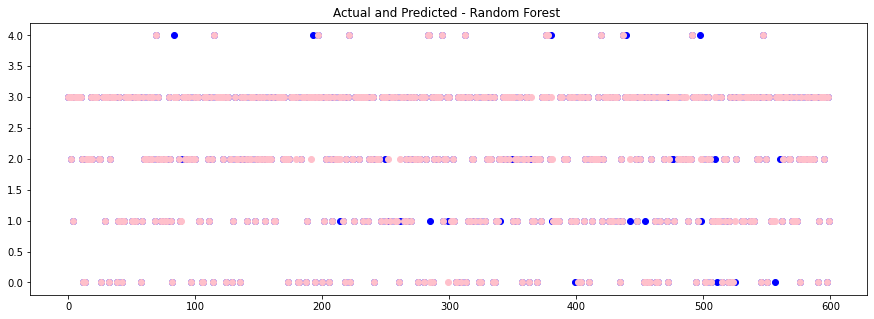

In [81]:

plt.figure(figsize=(15,5))
plt.title('Actual and Predicted - Random Forest ')
x = np.arange(len(y_test))
plt.scatter(x,y_test,color='b')
plt.scatter(x,y_pred_rf,color='pink')

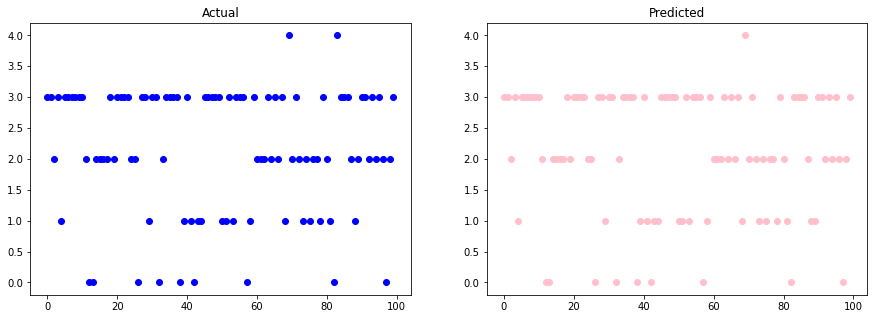

In [53]:
plt.figure(figsize=(15,5))

x = np.arange(len(y_test[:100]))
plt.subplot(121)
plt.title('Actual')
plt.scatter(x,y_test[:100],color='b')
plt.subplot(122)
plt.title('Predicted')
plt.scatter(x,y_pred_rf[:100],color='pink')

### Evalution metrics

In [54]:
as_rf = accuracy_score(y_test, y_pred_dt)
rc_rf = recall_score(y_test, y_pred_dt, average='weighted')
f1_rf = f1_score(y_test, y_pred_dt, average='weighted')
pc_rf = precision_score(y_test, y_pred_dt,average='weighted')

In [55]:
df2 = {'Model': 'Random Forrest', 'Accuracy': as_rf, 'Recall':rc_rf ,'F1-score':f1_rf,'Precision':pc_rf}
compare = compare.append(df2, ignore_index = True)

/var/folders/s5/fs8wsfxx4tndrhq92pr2nzq80000gn/T/ipykernel_14926/3379997509.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(df2, ignore_index = True)


In [56]:
compare

,Model,Accuracy,Recall,F1-score,Precision
0,Naive Bayes,0.916667,0.916667,0.915839,0.915953
1,Decision Tree,0.950000,0.950000,0.949888,0.949890
2,Random Forrest,0.950000,0.950000,0.949888,0.949890


<span style="font-size:18px" > We can see the scores

*********

<span style="font-size:28px" ><mark> K Neighbors Classifier </mark> <span> 

### Loading the library

In [57]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import neighbors

### Finding K with the lowest error

Minimum error:- 0.058333333333333334 at K = 3


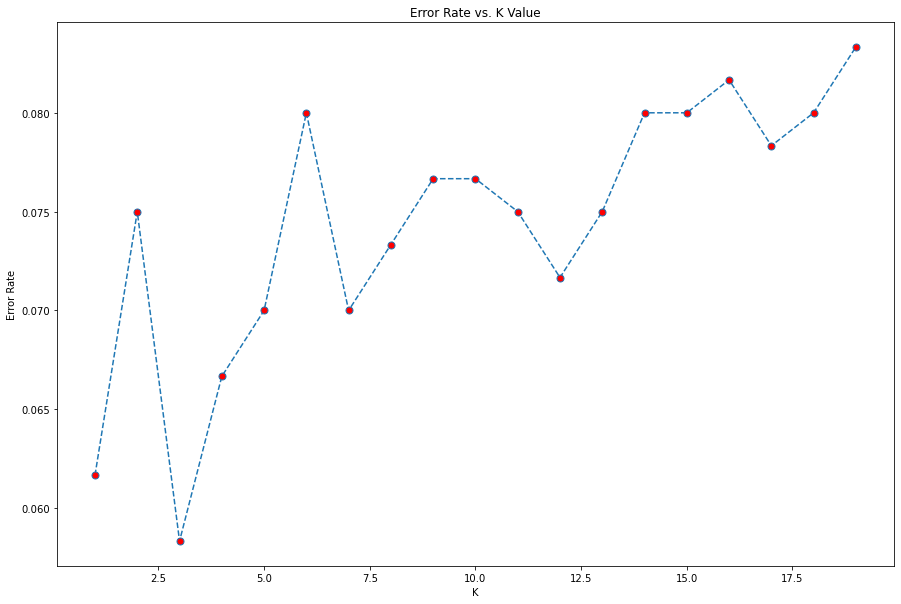

In [58]:
error_rate = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    pred = clf.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,20), error_rate, linestyle='dashed', marker='o',markerfacecolor='red', ms=7)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

<span style="font-size:18px" >We can determine 3 as our K value as it has the lowest error.

### Building and Fitting the model

In [59]:
k = 3
knn_model = neighbors.KNeighborsClassifier(k)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Predictions

In [60]:
knn_y_pred = knn_model.predict(x_test)
print('Predicted values:',knn_y_pred)

Predicted values: [3 3 2 3 1 3 3 3 3 3 3 2 0 0 2 2 2 2 3 2 3 3 3 3 2 2 0 3 3 1 3 3 0 2 3 3 3
 3 0 1 3 1 0 1 1 3 3 3 3 3 1 0 3 2 3 3 3 0 1 3 2 2 2 3 2 3 2 3 1 4 3 3 2 1
 2 1 2 2 1 3 2 1 0 4 3 3 3 2 1 2 3 3 2 3 2 3 2 0 2 3 2 3 3 1 1 0 0 3 3 3 2
 1 3 2 0 4 3 3 3 3 3 3 2 3 0 3 3 2 2 0 1 3 2 2 2 0 3 2 3 3 2 1 2 3 2 3 3 1
 2 3 2 2 3 2 3 0 2 2 3 2 2 3 1 1 3 3 3 3 3 2 3 2 1 0 2 3 3 3 3 2 3 0 0 2 3
 3 3 0 1 3 3 2 3 4 0 3 3 4 3 3 0 0 3 2 3 0 3 2 1 3 2 2 2 3 1 3 1 3 0 2 3 4
 0 2 2 1 3 3 3 2 3 3 1 3 3 3 1 2 3 2 3 0 2 2 2 3 1 3 3 2 1 3 1 1 3 3 3 1 3
 1 0 1 3 3 1 3 2 1 3 2 1 3 2 3 2 0 2 2 3 3 0 3 2 4 4 1 3 0 2 3 3 2 3 3 4 1
 2 2 3 0 3 1 1 2 1 0 0 3 3 0 3 3 4 0 3 1 3 1 2 2 1 3 3 0 1 0 3 3 1 3 2 2 3
 2 0 3 0 1 1 2 2 2 3 3 2 3 2 2 3 3 1 3 2 1 2 3 3 0 3 2 3 3 2 0 3 1 2 1 2 0
 2 2 0 3 3 3 4 3 4 2 3 2 1 1 1 2 1 3 3 3 2 2 2 2 3 3 1 3 3 1 1 0 3 2 1 3 1
 2 3 3 1 2 1 2 2 2 2 3 2 4 1 2 3 3 3 3 1 3 1 1 3 3 3 1 0 2 1 4 3 4 3 3 1 3
 3 3 3 2 1 3 2 3 3 0 1 3 0 3 0 2 3 3 1 0 0 3 1 3 3 2 3 1 0 3 3 3 3 1 3 3 2
 2 2 3 

### Visualizations

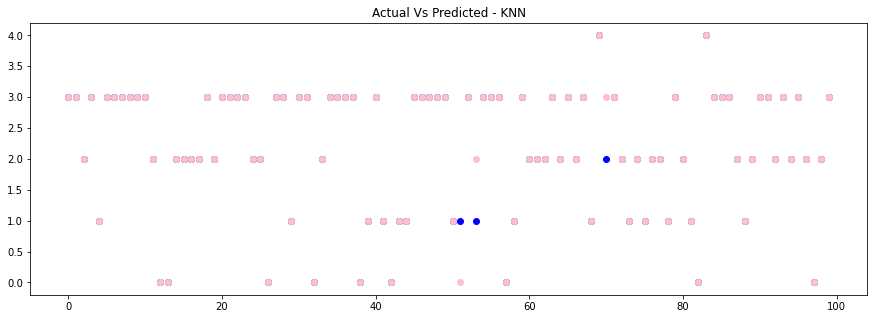

In [61]:
plt.figure(figsize=(15,5))
plt.title('Actual Vs Predicted - KNN')
x = np.arange(len(y_test[:100]))
plt.scatter(x,y_test[:100],label='Actual',color='b')
plt.scatter(x,knn_y_pred[:100],label='Predicted',color='pink')

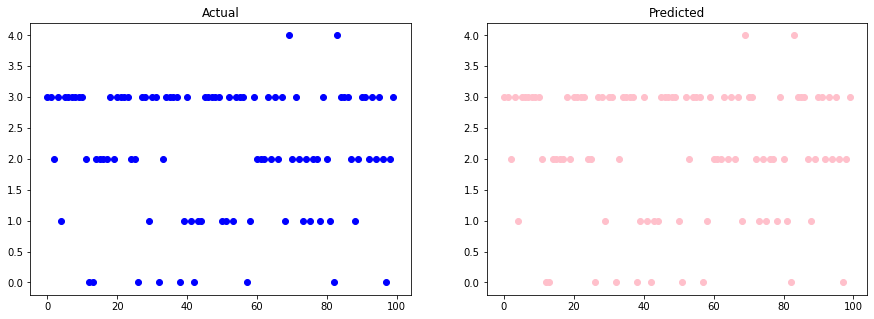

In [62]:
plt.figure(figsize=(15,5))
x = np.arange(len(y_test[:100]))
plt.subplot(121)
plt.title('Actual')
plt.scatter(x,y_test[:100],color='b')
plt.subplot(122)
plt.title('Predicted')
plt.scatter(x,knn_y_pred[:100],color='pink')

### Accuracy Score

In [63]:
print('Performance = ',knn_model.score(x_test, y_test))

Performance =  0.9416666666666667


### Confusion Matrix 

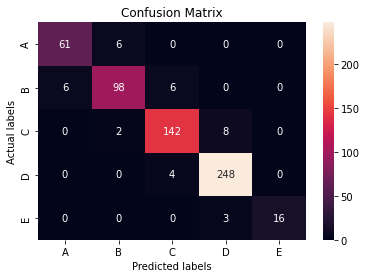

In [64]:
cmknn = confusion_matrix(y_test, knn_y_pred)

ax= plt.subplot()
sb.heatmap(cmknn, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels');ax.set_ylabel('Actual labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A','B','C','D','E']); ax.yaxis.set_ticklabels(['A','B','C','D','E']);


### Evaluation metrics

In [65]:
ac_knn = accuracy_score(y_test, knn_y_pred)
rec_knn =  recall_score(y_test, knn_y_pred, average='weighted')
f1_knn = f1_score(y_test, knn_y_pred, average='weighted')
prec_knn = precision_score(y_test, knn_y_pred, average='weighted')

<span style="font-size:18px" > We see there were wrongly predicted datapoints.

In [66]:
df2 = {'Model': 'KNN', 'Accuracy': ac_knn, 'Recall':rec_knn ,'F1-score':f1_knn,'Precision':prec_knn}
compare = compare.append(df2, ignore_index = True)

/var/folders/s5/fs8wsfxx4tndrhq92pr2nzq80000gn/T/ipykernel_14926/1767132659.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(df2, ignore_index = True)


In [67]:
compare

,Model,Accuracy,Recall,F1-score,Precision
0,Naive Bayes,0.916667,0.916667,0.915839,0.915953
1,Decision Tree,0.950000,0.950000,0.949888,0.949890
2,Random Forrest,0.950000,0.950000,0.949888,0.949890
3,KNN,0.941667,0.941667,0.941315,0.941659


<span style="font-size:18px" >We can see the error scores

****************************

<span style="font-size:28px" ><mark> Ada Boost Classifier </mark> <span> 

### Loading the libraries

In [68]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate,cross_val_predict

### Building the model and using cross validation to get best model

In [69]:
ada_model = AdaBoostClassifier(random_state=10)

scoring=['accuracy','f1_weighted','recall_weighted','precision_weighted']
ada_scores = cross_validate(ada_model, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

acu_boost =  np.mean(ada_scores['test_accuracy'])
f1_boost =  np.mean(ada_scores['test_f1_weighted']) 
prec_boost =  np.mean(ada_scores['test_precision_weighted']) 
rec_boost =  np.mean(ada_scores['test_recall_weighted'])

/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/apple/opt/anaconda3/lib/python3.9/site-packages/skl

### Fitting the model

In [70]:
adaboost = AdaBoostClassifier().fit(x_train, y_train)

### Predictions

In [71]:
ab_pred = adaboost.predict(x_test)
print('Predictions : ',ab_pred)

Predictions :  [3 3 2 3 1 3 3 3 3 3 3 2 0 0 2 2 2 2 3 2 3 3 3 3 2 2 0 3 3 0 3 3 0 2 3 3 3
 3 0 1 3 0 0 0 0 3 3 3 3 3 1 0 3 1 3 3 3 0 0 3 2 2 2 3 2 3 2 3 1 3 2 3 2 0
 2 1 2 2 1 3 2 1 0 3 3 3 3 2 1 1 3 3 2 3 2 3 2 0 2 3 2 3 3 0 0 0 0 3 3 2 2
 1 3 2 0 3 3 3 3 3 3 3 2 3 0 3 3 2 2 0 0 3 2 2 2 0 3 2 3 3 2 1 2 3 2 3 3 1
 2 3 2 2 3 2 3 0 2 2 3 2 2 3 1 1 3 3 3 3 3 2 3 2 2 0 2 3 3 3 3 2 3 0 0 2 3
 3 3 0 0 3 3 2 3 3 0 3 3 3 3 3 0 0 3 2 3 0 3 2 1 3 2 2 2 3 2 3 1 3 0 2 3 3
 0 2 2 0 3 3 3 2 3 3 1 3 3 3 1 2 3 2 3 0 2 1 2 2 1 3 3 3 1 3 2 0 3 3 3 0 3
 1 0 1 3 3 1 3 2 1 3 2 1 3 2 3 2 0 2 2 3 3 0 3 2 3 3 0 3 0 2 3 3 2 3 3 3 1
 2 2 3 0 3 1 1 2 1 0 0 3 3 0 3 3 3 0 3 0 3 1 2 2 1 3 3 0 0 0 3 3 0 3 2 2 3
 2 0 3 0 0 1 2 2 2 3 3 2 3 3 2 3 3 1 3 2 0 2 3 3 0 3 2 3 3 2 0 3 1 2 1 2 0
 2 2 0 3 3 3 3 3 3 2 3 2 1 1 1 1 0 3 3 3 2 2 2 2 3 3 1 3 3 0 0 0 3 2 0 3 1
 2 3 3 0 2 1 2 2 2 2 3 2 3 1 2 3 3 3 3 0 3 0 1 3 3 3 1 0 2 1 3 3 3 3 3 2 3
 3 3 3 2 0 3 3 3 3 0 0 3 0 3 0 2 3 3 0 0 0 3 1 3 3 2 3 1 0 2 3 3 3 1 3 3 2
 2 2 3 3 2

### Visualizations

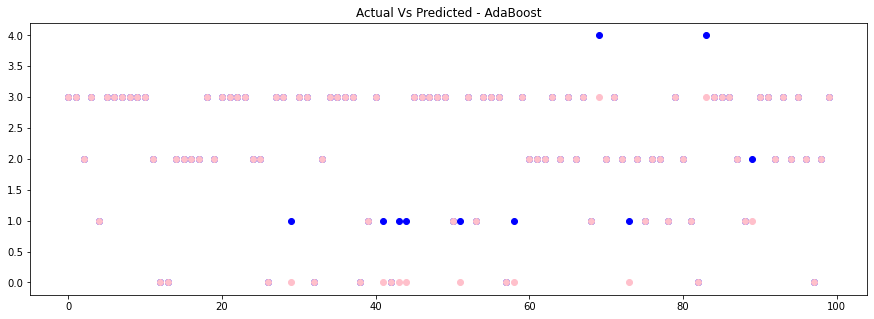

In [72]:

plt.figure(figsize=(15,5))
plt.title('Actual Vs Predicted - AdaBoost')
x = np.arange(len(y_test[:100]))
plt.scatter(x,y_test[:100],label='Actual',color='b')
plt.scatter(x,ab_pred[:100],label='Predicted',color='pink')

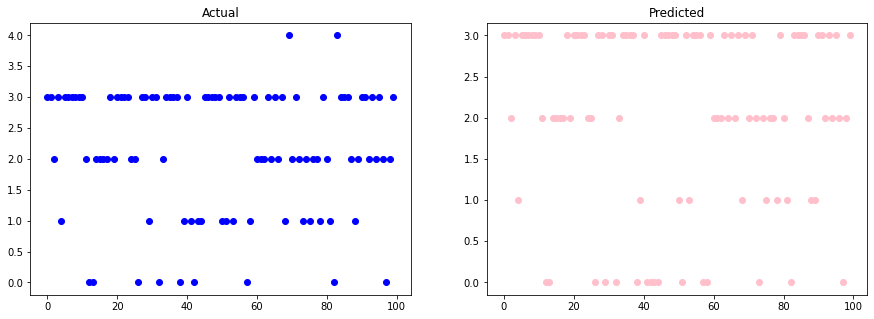

In [73]:
plt.figure(figsize=(15,5))
x = np.arange(len(y_test[:100]))
plt.subplot(121)
plt.title('Actual')
plt.scatter(x,y_test[:100],color='b')
plt.subplot(122)
plt.title('Predicted')
plt.scatter(x,ab_pred[:100],color='pink')

In [74]:
df2 = {'Model': 'Ada Boost', 'Accuracy': acu_boost, 'Recall':f1_boost ,'F1-score':prec_boost,'Precision':rec_boost}
compare = compare.append(df2, ignore_index = True)

/var/folders/s5/fs8wsfxx4tndrhq92pr2nzq80000gn/T/ipykernel_14926/1135251882.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(df2, ignore_index = True)


In [75]:
compare 

,Model,Accuracy,Recall,F1-score,Precision
0,Naive Bayes,0.916667,0.916667,0.915839,0.915953
1,Decision Tree,0.950000,0.950000,0.949888,0.949890
2,Random Forrest,0.950000,0.950000,0.949888,0.949890
3,KNN,0.941667,0.941667,0.941315,0.941659
4,Ada Boost,0.597778,0.569865,0.602851,0.597778


*********************

<span style="font-size:28px" ><mark> Stacking </mark> <span> 

### Building the stacking model

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# 1. Base model : KNN, Decision tree, SVM, Naive bayes

def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('KNN', KNeighborsClassifier()))
	level0.append(('DT', DecisionTreeClassifier()))
	level0.append(('NB', GaussianNB()))
 
	# define meta learner model
	level1 = KNeighborsClassifier()
 
	# define the stacking ensemble
	s_model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return s_model

# define the model
meta_model = get_stacking()

# evaluate the model
stack_scores = cross_validate(meta_model, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

ac_stack = np.mean(stack_scores['test_accuracy'])
f1_stack = np.mean(stack_scores['test_f1_weighted'])
pre_stack = np.mean(stack_scores['test_precision_weighted'])
rec_stack = np.mean(stack_scores['test_recall_weighted'])


### Fitting the model amnd Performing Predicitons

In [77]:
stack = get_stacking().fit(x_train, y_train)

stack_pred = stack.predict(x_test)
print('Predictions : ',stack_pred)

Predictions :  [3 3 2 3 1 3 3 3 3 3 3 2 0 0 1 2 2 2 3 2 3 3 3 3 2 2 0 3 3 1 3 3 0 2 3 3 3
 3 0 1 3 1 0 1 1 3 3 3 3 3 1 1 3 1 3 3 3 0 1 3 1 2 2 3 2 3 2 3 1 4 3 3 2 1
 2 1 2 2 1 3 2 1 0 3 3 3 3 2 1 1 3 3 2 3 2 3 2 0 2 3 2 3 3 1 1 0 0 3 3 2 2
 1 3 2 0 4 3 3 2 3 3 3 2 3 0 3 3 2 2 0 1 3 2 2 2 0 3 2 3 3 2 1 2 3 2 3 3 1
 2 3 2 2 3 2 3 1 2 2 3 2 2 3 1 1 3 3 3 3 3 2 3 2 1 0 1 3 3 3 3 2 3 0 0 2 3
 3 3 0 1 3 3 2 3 3 0 3 3 4 3 3 0 1 3 2 3 0 3 2 1 3 2 2 2 3 2 3 1 3 0 2 3 4
 0 2 2 1 3 3 3 2 3 3 1 3 3 3 1 2 3 2 3 0 2 2 2 2 1 3 3 2 1 3 2 1 3 3 3 1 3
 1 0 1 3 3 1 3 2 1 3 2 1 3 2 3 2 0 2 2 3 3 0 3 2 4 4 1 3 0 2 3 3 2 3 3 4 1
 2 2 3 0 3 1 1 2 1 0 0 3 3 0 3 3 4 0 3 1 3 1 2 2 1 3 3 1 1 0 3 3 1 3 2 2 3
 2 0 3 0 1 1 2 1 2 3 3 2 3 3 2 3 3 1 3 2 1 2 3 3 0 2 2 3 3 2 0 3 1 2 1 2 0
 2 2 1 3 3 4 4 3 4 2 3 2 1 1 1 1 1 3 3 3 2 2 2 2 3 3 1 3 3 1 1 0 3 2 1 3 1
 2 3 3 1 2 1 2 2 2 2 3 2 3 1 2 3 3 3 3 1 3 1 1 3 3 3 1 0 2 1 4 3 4 3 3 1 3
 3 3 3 2 1 3 2 3 3 0 1 3 0 3 0 2 3 3 1 0 0 3 1 3 3 2 3 1 0 2 3 2 2 1 3 3 2
 2 2 3 3 2

### Visualizations

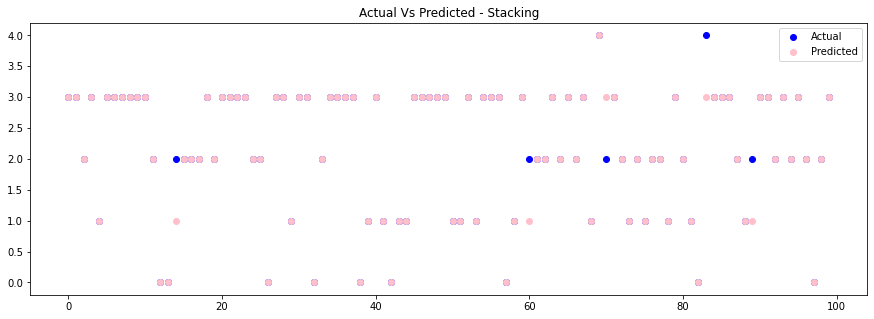

In [78]:
plt.figure(figsize=(15,5))
plt.title('Actual Vs Predicted - Stacking')
x = np.arange(len(y_test[:100]))
plt.scatter(x,y_test[:100],label='Actual',color='b')
plt.scatter(x,stack_pred[:100],label='Predicted',color='pink')
plt.legend()
plt.show()

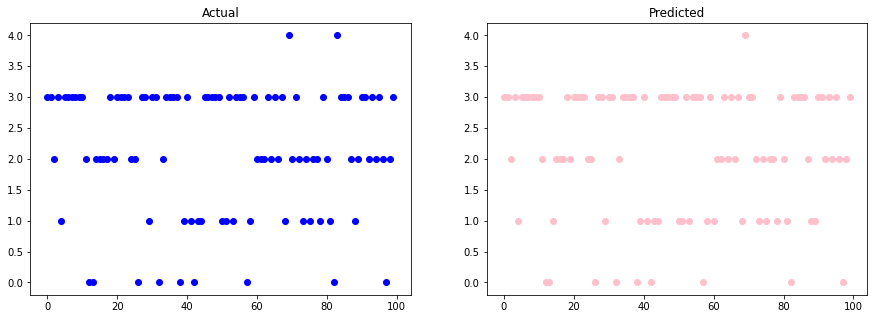

In [79]:
plt.figure(figsize=(15,5))
x = np.arange(len(y_test[:100]))
plt.subplot(121)
plt.title('Actual')
plt.scatter(x,y_test[:100],color='b')
plt.subplot(122)
plt.title('Predicted')
plt.scatter(x,stack_pred[:100],color='pink')

In [83]:
df2 = {'Model': 'Stacking', 'Accuracy': ac_stack, 'Recall':f1_stack ,'F1-score':pre_stack,'Precision':rec_stack}
compare = compare.append(df2, ignore_index = True)

/var/folders/s5/fs8wsfxx4tndrhq92pr2nzq80000gn/T/ipykernel_14926/226241960.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  compare = compare.append(df2, ignore_index = True)


********************************

<div class="alert alert-info"> <p style="text-align:center;" >  <span style="font-size:28px" > Comprison of models<span>  </div> <p>

In [84]:
compare 

,Model,Accuracy,Recall,F1-score,Precision
0,Naive Bayes,0.916667,0.916667,0.915839,0.915953
1,Decision Tree,0.950000,0.950000,0.949888,0.949890
2,Random Forrest,0.950000,0.950000,0.949888,0.949890
3,KNN,0.941667,0.941667,0.941315,0.941659
4,Ada Boost,0.597778,0.569865,0.602851,0.597778
5,Stacking,0.835778,0.834313,0.835206,0.835778


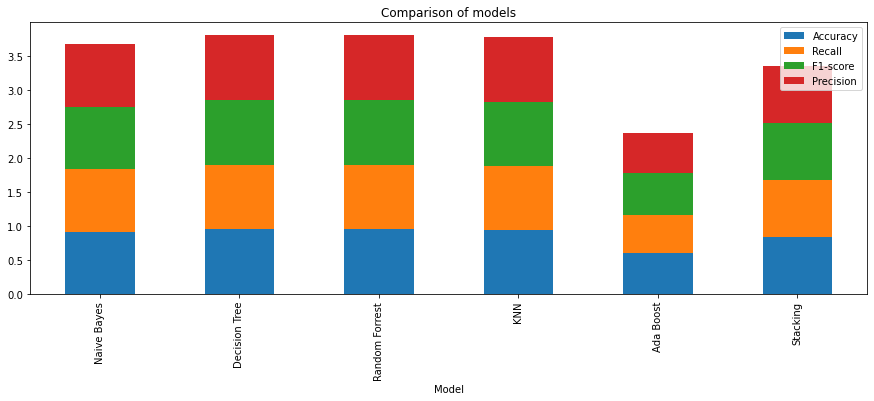

In [85]:

compare_plot = compare[['Model','Accuracy','Recall','F1-score','Precision']]
compare_plot.plot(x='Model', kind='bar', stacked=True, title='Comparison of models',figsize=(15,5))
plt.show()

<span style="font-size:28px" >We can see that the decision tree and the random forest algorithms have highest and similar accuracy and other model performance scores therefore we can conclude that either of these models will give us correct predictions of the house grades.